# Bot training with example data (classification of user requests)

## Data preparation

In [1]:
import random
import json
import pickle
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
lemmatizer = WordNetLemmatizer()

In [3]:
requests = json.loads(open('example_data.json').read())

In [4]:
words = []
classes = []
documents = []
ignore_letters = ['?', '!', ',', '.']

In [5]:
for request in requests['requests']:
    for pattern in request['patterns']:
        word_list = nltk.word_tokenize(pattern)
        words.extend(word_list)
        documents.append((word_list, request['tag']))
        if request['tag'] not in classes:
            classes.append(request['tag'])
print(documents)

[(['hello'], 'greeting'), (['hey'], 'greeting'), (['hi'], 'greeting'), (['hello', 'bot'], 'greeting'), (['goodday'], 'greeting'), (['good', 'day'], 'greeting'), (['greetings'], 'greeting'), (['good', 'evening'], 'greeting'), (['goodevening'], 'greeting'), (['heya'], 'greeting'), (['thank', 'you', ',', 'good', 'bye'], 'goodbye'), (['thanks', ',', 'good', 'bye'], 'goodbye'), (['thanks', 'bye'], 'goodbye'), (['bye'], 'goodbye'), (['bye', 'bye'], 'goodbye'), (['thank', 'you'], 'goodbye'), (['alright'], 'goodbye'), (['byebye'], 'goodbye'), (['goodbye'], 'goodbye'), (['thank', 'you', ',', 'goodbye'], 'goodbye'), (['thanks', 'goodbye'], 'goodbye'), (['ok'], 'goodbye'), (['okay'], 'goodbye'), (['could', 'i', 'get', 'the', 'contacts', 'of', 'the', 'firm', '?'], 'contact_request'), (['could', 'i', 'get', 'the', 'contacts', 'of', 'the', 'company', '?'], 'contact_request'), (['what', 'are', 'the', 'contacts', 'of', 'the', 'firm', '?'], 'contact_request'), (['what', 'are', 'the', 'contacts', 'of', 

In [6]:
words = [lemmatizer.lemmatize(word.lower()) for word in words if word not in ignore_letters]
# eliminates duplicates
words = sorted(set(words))

In [7]:
print(words)

["'s", '0442964546', '044296458646', '0442964646', '0445110345', '0445234386', '0445234586', '0445250758', '0445327974', '0445327978', '0445824586', '0445829186', 'a', 'about', 'alright', 'are', 'availability', 'available', 'bot', 'buy', 'bye', 'byebye', 'can', 'company', 'contact', 'could', 'day', 'detail', 'do', 'evening', 'firm', 'get', 'good', 'goodbye', 'goodday', 'goodevening', 'greeting', 'have', 'hello', 'hey', 'heya', 'hi', 'how', 'i', 'info', 'information', 'injector', 'is', 'link', 'may', 'need', 'of', 'ok', 'okay', 'on', 'purchase', 'site', 'thank', 'thanks', 'the', 'this', 'to', 'want', 'what', 'you']


In [8]:
classes = sorted(set(classes))

In [9]:
pickle.dump(words, open('words.pkl', 'wb'))

In [10]:
pickle.dump(classes, open('classes.pkl', 'wb'))

In [11]:
training = []
output_empty = [0] * len(classes)
for document in documents:
    bag = []
    word_patterns = document[0]
    word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)
    output_row = list(output_empty)
    output_row[classes.index(document[1])] = 1
    training.append([bag, output_row])

In [12]:
random.shuffle(training)
training = np.array(training)

<ipython-input-12-cc0bc1dae1db>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


In [13]:
train_x = list(training[:, 0])
train_y = list(training[:, 1])

## Model building

In [14]:
model = Sequential()
# relu - takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive
model.add(Dense(128, input_shape = (len(train_x[0]),), activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
# softmax - used in output layers of neural network models that predict a multinomial probability distribution
model.add(Dense(len(train_y[0]), activation = 'softmax'))

In [15]:
sgd = SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
# categorical crossentropy - loss function for multi-class classification models where there are two or more output labels
# sgd - stochastic gradient descent
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])
var = model.fit(np.array(train_x), np.array(train_y), epochs = 200, batch_size = 5, verbose = 1)
model.save('supportbot_model.h5', var)
print('Done')

Epoch 1/200
11/11 [==============================] - 0s 4ms/step - loss: 1.6960 - accuracy: 0.2778
Epoch 2/200
11/11 [==============================] - 0s 5ms/step - loss: 1.5735 - accuracy: 0.3704
Epoch 3/200
11/11 [==============================] - ETA: 0s - loss: 1.4884 - accuracy: 0.40 - 0s 9ms/step - loss: 1.4793 - accuracy: 0.4074
Epoch 4/200
11/11 [==============================] - 0s 3ms/step - loss: 1.3314 - accuracy: 0.4630
Epoch 5/200
11/11 [==============================] - 0s 10ms/step - loss: 1.3045 - accuracy: 0.5000
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 1.0295 - accuracy: 0.7407
Epoch 7/200
11/11 [==============================] - 0s 5ms/step - loss: 0.9379 - accuracy: 0.6852
Epoch 8/200
11/11 [==============================] - 0s 6ms/step - loss: 0.8035 - accuracy: 0.8148
Epoch 9/200
11/11 [==============================] - 0s 4ms/step - loss: 0.8178 - accuracy: 0.7407
Epoch 10/200
11/11 [==============================] - 0s 4ms/step 

11/11 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9815
Epoch 82/200
11/11 [==============================] - 0s 3ms/step - loss: 0.0821 - accuracy: 0.9815
Epoch 83/200
11/11 [==============================] - 0s 3ms/step - loss: 0.0610 - accuracy: 0.9630
Epoch 84/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0809 - accuracy: 0.9815
Epoch 85/200
11/11 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 1.00 - 0s 4ms/step - loss: 0.0967 - accuracy: 0.9815
Epoch 86/200
11/11 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9815
Epoch 87/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0784 - accuracy: 0.9815
Epoch 88/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0641 - accuracy: 0.9815
Epoch 89/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0663 - accuracy: 0.9815
Epoch 90/200
11/11 [==============================] - 0s 4ms/step - los

11/11 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9815
Epoch 161/200
11/11 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 1.0000
Epoch 162/200
11/11 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9815
Epoch 163/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0322 - accuracy: 0.9815
Epoch 164/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0169 - accuracy: 1.0000
Epoch 165/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0501 - accuracy: 0.9815
Epoch 166/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 167/200
11/11 [==============================] - 0s 5ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 168/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0168 - accuracy: 1.0000
Epoch 169/200
11/11 [==============================] - 0s 6ms/step - loss: 0.0104 - accuracy: 1.0000
Epoc

In [16]:
model.history.history.keys()

dict_keys(['loss', 'accuracy'])

In [17]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy
0,1.696001,0.277778
1,1.573450,0.370370
2,1.479268,0.407407
3,1.331402,0.462963
4,1.304478,0.500000
...,...,...
195,0.019664,1.000000
196,0.020090,1.000000
197,0.023200,0.981481
198,0.010785,1.000000


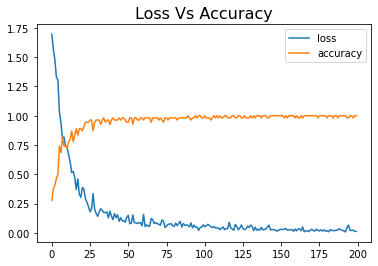

In [18]:
metrics[['loss', 'accuracy']].plot()
plt.title('Loss Vs Accuracy', fontsize=16)
plt.show()